# Assignment 10

### 1.复习上课内容

### 2. 回答一下理论题目

#### 1. What is independent assumption in Naive bayes ?

Ans: There is independence between any two variables or no correlation between them.

#### 2. What is MAP(maximum a posterior) and ML(maximum likelihood) ?

Ans: Suppose that based on the Bayesian theory:
$$ h_{MAP} = \max{P(h|D)} = \max{\frac{P(D|h)*P(h)}{P(D)}} $$

In this equation, the maximization of posterior probability P(h|D) is called the MAP; Thinking that P(D) is a constant and P(h) is a prior probability, we take the P(D|h) as the likelihood, so the maximization of P(D|h) is called ML.

#### 3. What is support vector in SVM?

Ans: The support vector is the point that determines the seperation line (2D) or surface (3D) or hypersurface (4 or even higher Dimension).

#### 4. What is the intuition behind SVM ?

Ans: A constrained optimization under inequality condition is computed to determine parameters for SVM. Even though when there is non-linear SVM, we can use kernel function to transform data into higher dimersion to find seperation hypersurface.

#### 5. Shortly describ what 'random' means in random forest ?

Ans: There are two random things in the random forest, which include: 1. randomly selecting data from the whole dataset; 2. randomly selecting variables from all variables.

#### 6. What cariterion does XGBoost use to find the best split point in a tree ?

Ans: suppose that:
$$ obj = -\sum\limits_{j=1}{\frac{G_{i}^2}{H_{i}+\lambda}}+\gamma * T $$
$$ L_{i}: Loss function; G_{i}=L'_{i}; H_{i}=L''_{i}; \gamma: PenaltyCoefficient; T: NumberOfLeaves $$

The criterion for splitting tree is to find a point that could minimize obj.

### 3. Practial part

##### Problem description: In this part you are going to build a classifier to detect if a piece of news is published by the Xinhua news agency (新华社）.

#### Hints:

###### 1. Firstly, you have to come up with a way to represent the news. (Vectorize the sentence, you can find different ways to do so online)  

###### 2. Secondly,  pick a machine learning algorithm that you think is suitable for this task

### prepare data

In [5]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [2]:
CN_news = pd.read_csv('../5th/sqlResult_1558435.csv', encoding = 'GB18030')

In [3]:
CN_news.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [21]:
# add label to separate 新华社 and 非新华社
import re
is_Xinhua_Agency = [1 if len(re.findall(r'新华社', str(CN_news.iloc[x]['source']))) > 0 else 0 for x in range(CN_news.shape[0])]
CN_news['label'] = is_Xinhua_Agency
CN_news.head()

,id,author,source,content,feature,title,url,label
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm,0
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm,0
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm,0
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....,1
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...,0


### transforming sentence to vector

In [33]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import jieba

In [58]:
# jieba.lcut(CN_news.iloc[1]['content'], cut_all=False)
CN_news_tagged = [TaggedDocument(jieba.lcut(str(CN_news.iloc[x]['content']), cut_all=False),[CN_news.iloc[x]['id']])\
                 for x in range(CN_news.shape[0])]

In [59]:
CN_news_tagged[:5]

[TaggedDocument(words=['此外', '，', '自', '本周', '（', '6', '月', '12', '日', '）', '起', '，', '除', '小米', '手机', '6', '等', '15', '款', '机型', '外', '，', '其余', '机型', '已', '暂停', '更新', '发布', '（', '含', '开发', '版', '/', '体验版', '内测', '，', '稳定版', '暂不受', '影响', '）', '，', '以', '确保', '工程师', '可以', '集中', '全部', '精力', '进行', '系统优化', '工作', '。', '有人', '猜测', '这', '也', '是', '将', '精力', '主要', '用到', 'MIUI', ' ', '9', '的', '研发', '之中', '。', '\r\n', 'MIUI', ' ', '8', '去年', '5', '月', '发布', '，', '距今已有', '一年', '有余', '，', '也', '是', '时候', '更新换代', '了', '。', '\r\n', '当然', '，', '关于', 'MIUI', ' ', '9', '的', '确切', '信息', '，', '我们', '还是', '等待', '官方消息', '。', '\r\n'], tags=[89617]),
 TaggedDocument(words=['骁龙', '835', '作为', '唯一', '通过', 'Windows', ' ', '10', '桌面', '平台', '认证', '的', 'ARM', '处理器', '，', '高通', '强调', '，', '不会', '因为', '只', '考虑', '性能', '而', '去', '屏蔽掉', '小', '核心', '。', '相反', '，', '他们', '正', '联手', '微软', '，', '找到', '一种', '适合', '桌面', '平台', '的', '、', '兼顾', '性能', '和', '功耗', '的', '完美', '方案', '。', '\r\n', '报道', '称', '，', '微软', '已经', '拿到',

In [60]:
# model = Doc2Vec([TaggedDocument(jieba.lcut(CN_news.iloc[1]['content'], cut_all=False),[0])])
model = Doc2Vec(CN_news_tagged, vector_size=100, workers = 4) #vector_size = 100 by default

In [62]:
print(model.docvecs[CN_news.iloc[1]['id']])
print(CN_news.iloc[1]['content'])

[-0.12399907 -0.03250352  0.05038457 -0.20724161  0.08882274 -0.18710807
  0.21935238  0.01376936  0.00226417 -0.11315244  0.07802468  0.08247933
 -0.15744661  0.07970691 -0.00180947 -0.10532265 -0.10954722  0.35155642
 -0.22500087  0.24802004 -0.14183281  0.25153023 -0.16794245  0.15907684
 -0.14997438 -0.27647048 -0.35146728 -0.10114461  0.05985128 -0.06166695
  0.22147243  0.08179238 -0.11593585  0.0539988   0.08228628 -0.02720808
  0.185181    0.02883124  0.01928503  0.23452991 -0.12187962  0.16126005
 -0.07324347  0.15821728 -0.2818153   0.05224821 -0.25282055 -0.06274217
 -0.0315296   0.19670469  0.2091702   0.11163414 -0.40150666  0.18746491
 -0.01869351 -0.12305259  0.12724568  0.02466824  0.04285789 -0.00703209
 -0.08448143  0.19069374  0.11578066  0.05502074  0.03771751 -0.06295159
  0.02050549 -0.05285643  0.224874   -0.00599752 -0.05121909 -0.00750187
  0.00219686 -0.17703597  0.0645723   0.05757529  0.24033959  0.01921417
 -0.15131216  0.03406376  0.35482514  0.13653974  0

### Using SVM as classifier to separate news from Xinhua Agency and non-Xinhua Agency

In [67]:
from sklearn.svm import SVC

In [65]:
# add sentence vector to corresponding row
def add_sentence_vector_to_csv(csv, Model):
    sentence_vector_length = len(model.docvecs[CN_news.iloc[1]['id']])
    sentence_vector = [Model.docvecs[csv.iloc[x]['id']] for x in range(csv.shape[0])]
    csv2 = csv
    csv2['vector'] = sentence_vector
    
#     for i in range(sentence_vector_length):
#         csv2['feature' + str(i+1)] = [csv2.iloc[x]['vector'][i] for x in range(csv2.shape[0])]
    
    return csv2

CN_news_vector = add_sentence_vector_to_csv(CN_news, model)

In [66]:
CN_news_vector.head()

,id,author,source,content,feature,title,url,label,vector,feature1,...,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm,0,"[-0.04689578, -0.05935113, 0.05987382, -0.0749...",-0.046896,...,-0.110570,0.124327,0.091461,0.165342,0.020230,-0.018377,-0.190893,-0.092922,-0.083102,-0.137293
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm,0,"[-0.123999074, -0.03250352, 0.050384566, -0.20...",-0.123999,...,0.019285,0.234530,-0.121880,0.161260,-0.073243,0.158217,-0.281815,0.052248,-0.252821,-0.062742
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm,0,"[-0.16669287, -0.06184349, -0.1051068, -0.1060...",-0.166693,...,0.024666,-0.084473,-0.036390,0.293137,-0.129957,0.089324,-0.215649,-0.143602,-0.040214,0.066870
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....,1,"[0.026376223, 0.020916121, 0.054224826, -0.031...",0.026376,...,-0.050743,0.041950,0.065708,-0.010629,-0.020796,-0.067175,-0.048601,0.007141,0.094207,-0.016907
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...,0,"[0.23992884, 0.3802847, 0.45711118, -0.8107781...",0.239929,...,0.100716,-0.975710,0.586966,-0.416934,0.151382,-0.641255,0.428474,0.568714,-0.014180,-0.372496


In [82]:
train_data, test_data = train_test_split(CN_news_vector, test_size=0.2, random_state=1000)
print(train_data.shape)
print(test_data.shape)
train_X, train_Y = train_data['vector'], train_data['label']
test_X, test_Y = test_data['vector'], test_data['label']

# change dataset structure
train_X = [train_X.iloc[x] for x in range(train_X.shape[0])]
train_Y = [train_Y.iloc[x] for x in range(train_Y.shape[0])]

test_X = [test_X.iloc[x] for x in range(test_X.shape[0])]
test_Y = [test_Y.iloc[x] for x in range(test_Y.shape[0])]

(71688, 57)
(17923, 57)


In [85]:
train_X[0]
# train_Y[:10]

array([-0.05594846,  0.05122297,  0.02660196, -0.09916788,  0.01667983,
       -0.06203043,  0.22534269, -0.12408984,  0.04964542, -0.05341836,
       -0.01367599, -0.03642278,  0.06354875,  0.10985757, -0.0344713 ,
        0.04121603,  0.18345152, -0.04628585, -0.01782935,  0.16877645,
        0.00440141,  0.13015744, -0.07674067,  0.10362201,  0.0576628 ,
        0.00486974, -0.14255305,  0.01368986,  0.09972315,  0.00694131,
        0.13351764,  0.03716548, -0.00674113, -0.01180829,  0.07993937,
        0.12565427,  0.02677841,  0.05199614,  0.0777334 , -0.05706843,
        0.1818134 ,  0.13072513,  0.12473508,  0.02273336,  0.14583877,
        0.05451009, -0.02672136, -0.04796594,  0.15594417,  0.04751449,
       -0.09139748,  0.13835645, -0.02154704,  0.05248285, -0.04541029,
        0.01624612,  0.03318876,  0.03429036, -0.13254574,  0.0656096 ,
        0.0521662 ,  0.07624758,  0.15152815,  0.01285501, -0.02154922,
       -0.0944293 , -0.0422186 ,  0.09562555,  0.09723705, -0.00

In [95]:
# train
clf = SVC(probability=True)
clf.fit(train_X, train_Y)

/Users/wangqin/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [116]:
# predict y and probability
y_pred = clf.predict(test_X)
# y_pred = clf.decision_function(test_X)
y_pred_prob = clf.predict_proba(test_X)

In [102]:
# y_pred[:10]
# test_Y[:10]
print(y_pred[:10])
print(y_pred_prob[:10])
# compute accuracy
accuracy = sum([1 if test_Y[x] == y_pred[x] else 0 for x in range(len(test_Y))]) / len(test_Y)
accuracy #0.8900295709423646

[1 1 1 1 1 1 1 1 1 1]
[[0.07404704 0.92595296]
 [0.08823339 0.91176661]
 [0.05377264 0.94622736]
 [0.06777229 0.93222771]
 [0.06671284 0.93328716]
 [0.04608244 0.95391756]
 [0.06070159 0.93929841]
 [0.02565786 0.97434214]
 [0.05543944 0.94456056]
 [0.8834279  0.1165721 ]]


0.8900295709423646

AUPR =  0.9724773601798362
F1 Score =  0.9411659353452136


Text(0.5, 1.0, 'Precision-Recall Curve')

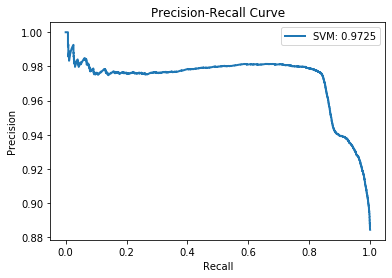

In [117]:
# PR-curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(test_Y, y_pred_prob[:,1])
AUPR = auc(recall, precision)
print('AUPR = ', AUPR)
F1_score = f1_score(test_Y, y_pred)
print('F1 Score = ', F1_score)
plt.plot(recall, precision, lw=2, label='SVM: ' + str(np.round(AUPR, 4)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.title('Precision-Recall Curve')

### Congratulations! You have completed all assignments in this week. The question below is optional. If you still have time, why don't try it out.

## Option:

#### Try differnt machine learning algorithms with different combinations of parameters in the practical part, and compare their performances (Better use some visualization techiniques).

### Using Naive Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [109]:
gnb = GaussianNB()
gnb.fit(train_X, train_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [111]:
y_pred_NB = gnb.predict(test_X)
y_pred_NB_prob = gnb.predict_proba(test_X)

In [124]:
accuracy_NB = sum([1 if test_Y[x] == y_pred_NB[x] else 0 for x in range(len(test_Y))]) / len(test_Y)
accuracy_NB

0.7927802265245774

AUPR =  0.9522298902384856
F1 Score =  0.8767505143691512


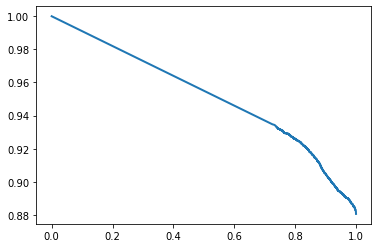

In [132]:
precision_NB, recall_NB, _ = precision_recall_curve(test_Y, y_pred_NB_prob[:,1])
AUPR_NB = auc(recall_NB, precision_NB)
print('AUPR = ', AUPR_NB)
F1_score_NB = f1_score(test_Y, y_pred_NB)
print('F1 Score = ', F1_score_NB)
plt.plot(recall_NB, precision_NB, lw=2, label='NB: ' + str(np.round(AUPR_NB, 4)))

### Using KNN

In [120]:
## KNN
from sklearn.neighbors import KNeighborsClassifier

In [122]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(train_X, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [123]:
y_pred_KNN = knn.predict(test_X)
y_pred_KNN_prob = knn.predict_proba(test_X)

In [128]:
# accuracy_KNN = knn.score(test_X, test_Y)
# accuracy_KNN # taking too long time

0.9075489594375942

In [127]:
accuracy_KNN = sum([1 if test_Y[x] == y_pred_KNN[x] else 0 for x in range(len(test_Y))]) / len(test_Y)
accuracy_KNN

0.9075489594375942

AUPR =  0.9819615719309953
F1 Score =  0.946237954641316


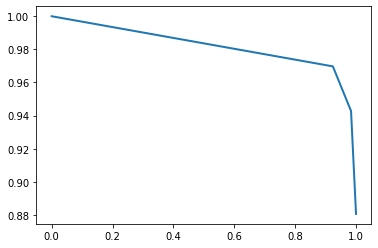

In [133]:
precision_KNN, recall_KNN, _ = precision_recall_curve(test_Y, y_pred_KNN_prob[:,1])
AUPR_KNN = auc(recall_KNN, precision_KNN)
print('AUPR = ', AUPR_KNN)
F1_score_KNN = f1_score(test_Y, y_pred_KNN)
print('F1 Score = ', F1_score_KNN)
plt.plot(recall_KNN, precision_KNN, lw=2, label='KNN: ' + str(np.round(AUPR_KNN, 4)))

### Using XGBoost

In [135]:
## XGBoost
from xgboost import XGBClassifier

In [137]:
XGB = XGBClassifier()
XGB.fit(np.array(train_X), np.array(train_Y))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [139]:
y_pred_XGB = XGB.predict(np.array(test_X))
y_pred_XGB_prob = XGB.predict_proba(np.array(test_X))

In [140]:
accuracy_XGB = sum([1 if test_Y[x] == y_pred_XGB[x] else 0 for x in range(len(test_Y))]) / len(test_Y)
accuracy_XGB

0.9209953690788373

AUPR =  0.987744014735832
F1 Score =  0.9566229628721972


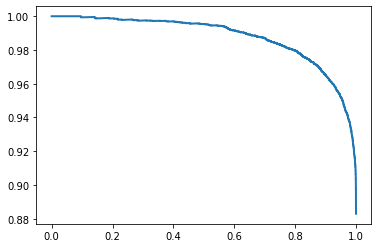

In [141]:
precision_XGB, recall_XGB, _ = precision_recall_curve(test_Y, y_pred_XGB_prob[:,1])
AUPR_XGB = auc(recall_XGB, precision_XGB)
print('AUPR = ', AUPR_XGB)
F1_score_XGB = f1_score(test_Y, y_pred_XGB)
print('F1 Score = ', F1_score_XGB)
plt.plot(recall_XGB, precision_XGB, lw=2, label='XGBoost: ' + str(np.round(AUPR_XGB, 4)))

## Summary

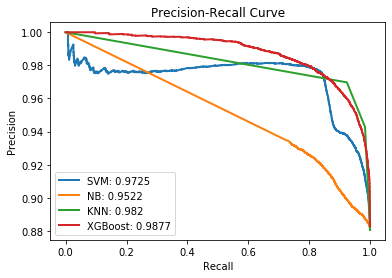

In [148]:
plt.plot(recall, precision, lw=2, label='SVM: ' + str(np.round(AUPR, 4)))

# Naive Bayes
plt.plot(recall_NB, precision_NB, lw=2, label='NB: ' + str(np.round(AUPR_NB, 4)))

# KNN
plt.plot(recall_KNN, precision_KNN, lw=2, label='KNN: ' + str(np.round(AUPR_KNN, 4)))

# XGBoost
plt.plot(recall_XGB, precision_XGB, lw=2, label='XGBoost: ' + str(np.round(AUPR_XGB, 4)))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.title('Precision-Recall Curve')

plt.show()

Text(0.5, 1.0, 'Accuracy')

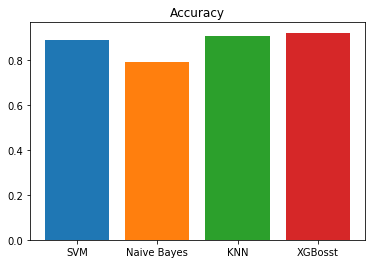

In [165]:
## Accuracy
%matplotlib inline
# plt.rcParams['axes.prop_cycle'].by_key()['color'][:4]
plt.bar(['SVM','Naive Bayes','KNN','XGBosst'],[accuracy, accuracy_NB, accuracy_KNN, accuracy_XGB],color=[u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728'])
plt.title('Accuracy')

In [163]:
# plt.rcParams['axes.prop_cycle'].by_key()['color']

Text(0.5, 1.0, 'F1 Score')

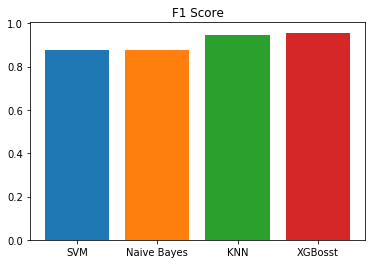

In [166]:
## F1 score
plt.bar(['SVM','Naive Bayes','KNN','XGBosst'],[F1_score, F1_score_NB, F1_score_KNN, F1_score_XGB],color=[u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728'])
plt.title('F1 Score')

## Conclusion

In general, the performance of XGBoost is the best, while that of Naive Bayes is the worst from three aspect of AUPR, Accuracy, and F1 score. By the way, SVM takes very long time to train in a dataset with tens of thousands samples, so it is worth thinking about data size before using SVM. 